In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [5]:
meal = pd.read_csv("C:/Users/roshn/OneDrive/Desktop/meal_info.csv.xls")

center = pd.read_csv("C:/Users/roshn/OneDrive/Desktop/fulfilment_center_info.csv.xls")

food = pd.read_csv("C:/Users/roshn/OneDrive/Desktop/train_food.csv.xls")

In [7]:
df=pd.merge(food,center,on="center_id")
df=pd.merge(df,meal,on="meal_id")

In [9]:
df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,TYPE_C,2.0,Beverages,Thai
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,TYPE_C,2.0,Beverages,Thai
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,TYPE_C,2.0,Beverages,Thai
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,TYPE_C,2.0,Beverages,Thai


In [11]:
meal.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [13]:
center.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [15]:
food.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [17]:
#creating bar graph
table=pd.pivot_table(data=df,index='category',values='num_orders',aggfunc=np.sum)
table

C:\Users\roshn\AppData\Local\Temp\ipykernel_31908\787702671.py:2: FutureWarning: The provided callable <function sum at 0x000001A394B35620> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  table=pd.pivot_table(data=df,index='category',values='num_orders',aggfunc=np.sum)


,num_orders
category,
Beverages,40480525
Biryani,631848
Desert,1940754
Extras,3984979
Fish,871959
Other Snacks,4766293
Pasta,1637744
Pizza,7383720
Rice Bowl,20874063


<BarContainer object of 14 artists>

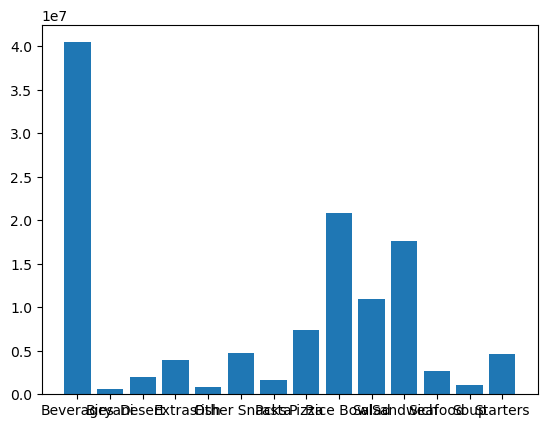

In [19]:
#barplot
plt.bar(table.index,table['num_orders'])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'Beverages'),
  Text(1, 0, 'Biryani'),
  Text(2, 0, 'Desert'),
  Text(3, 0, 'Extras'),
  Text(4, 0, 'Fish'),
  Text(5, 0, 'Other Snacks'),
  Text(6, 0, 'Pasta'),
  Text(7, 0, 'Pizza'),
  Text(8, 0, 'Rice Bowl'),
  Text(9, 0, 'Salad'),
  Text(10, 0, 'Sandwich'),
  Text(11, 0, 'Seafood'),
  Text(12, 0, 'Soup'),
  Text(13, 0, 'Starters')])

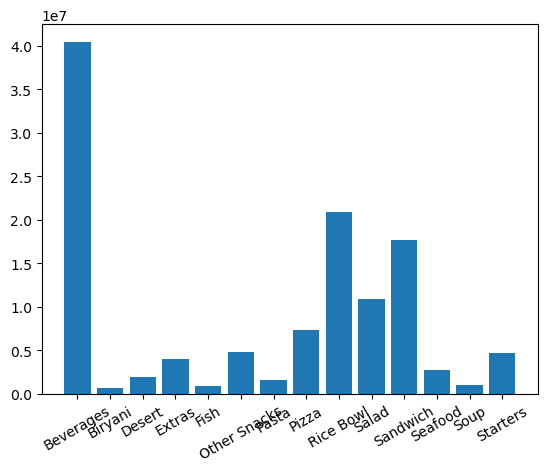

In [21]:
plt.bar(table.index,table['num_orders'])
plt.xticks(rotation=30)

Text(0.5, 1.0, 'most popular food')

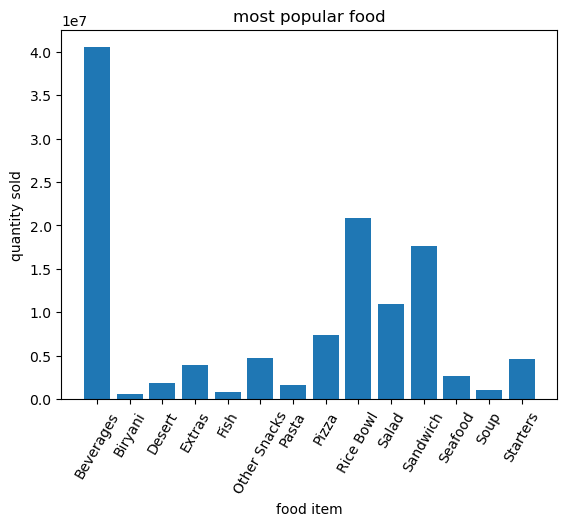

In [23]:
plt.bar(table.index,table['num_orders'])
plt.xticks(rotation=60)
plt.xlabel('food item')
plt.ylabel('quantity sold')
plt.title('most popular food')

In [25]:
plt.show()

In [27]:
#plt.bar(table.index, table['num_orders']) : creates a bar graph with index of the table on x-axis ('Food item') and number on orders on the y-axis

#plt.xticks(rotation=60) : rotates x-axis labels by 60 degree for better readibility

#plt.xlabel('Food item') : sets label for the x-axis

#plt.ylabel('Quantity sold') : sets label for the y-axis

#plt.title('Most popular food') : sets title for the graph

#plt.show() : displays the plot

Text(0.5, 1.0, 'cuisine share %')

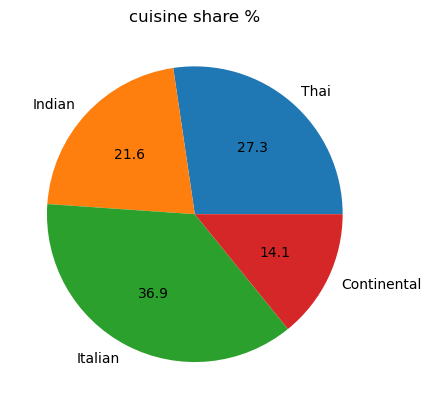

In [31]:
#pie chart
cuisine={}
total=df['num_orders'].sum()
for i in range(df['cuisine'].nunique()):
    c=df['cuisine'].unique()[i]
    c_order=df[df['cuisine']==c]['num_orders'].sum()
    cuisine[c]=c_order/total

plt.pie([x*100 for x in cuisine.values()],labels=[x for x in cuisine.keys()],autopct='%0.1f')

plt.title('cuisine share %')


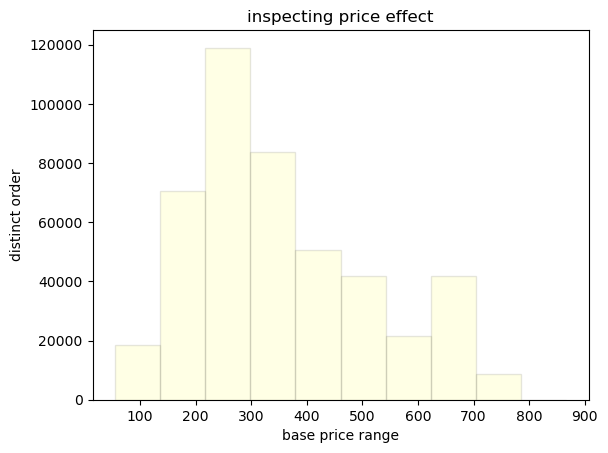

In [41]:
#histogram
plt.hist(df['base_price'],rwidth=1,alpha=0.1,color='yellow',bins=10,edgecolor='black')
plt.xlabel('base price range')
plt.ylabel('distinct order')
plt.title('inspecting price effect')
plt.show()

C:\Users\roshn\AppData\Local\Temp\ipykernel_31908\2868630921.py:2: FutureWarning: The provided callable <function sum at 0x000001A394B35620> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  table=pd.pivot_table(df,index='op_area',values='num_orders',aggfunc=np.sum)


         num_orders
op_area            
0.9          425160
1.9          497338
2.0         1521501
2.4          637527
2.7         3058120


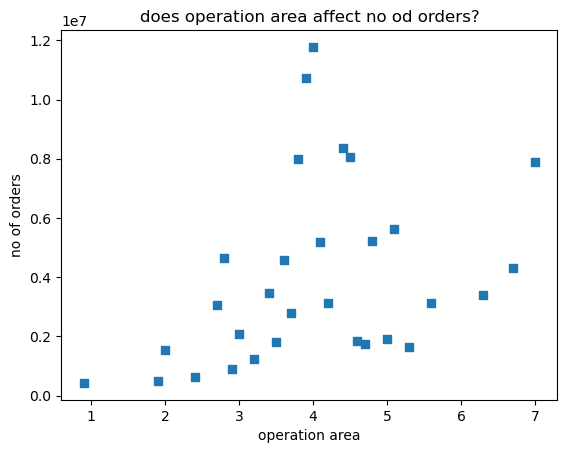

In [49]:
#scatter plot
table=pd.pivot_table(df,index='op_area',values='num_orders',aggfunc=np.sum)
print(table.head())

plt.scatter(table.index,table['num_orders'],marker='s')

plt.xlabel('operation area')
plt.ylabel('no of orders')
plt.title('does operation area affect no od orders?')
plt.savefig('scatter.png')
plt.show()

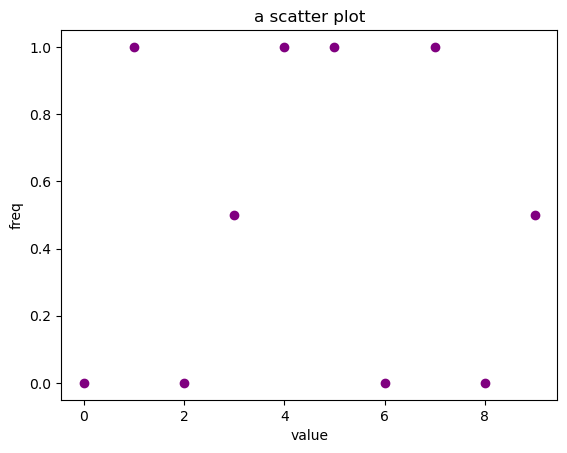

In [6]:
import numpy as np
from matplotlib import pyplot as plt
x=np.arange(10)
y=np.array([0,1,0,0.5,1,1,0,1,0,0.5])
plt.scatter(x,y,marker='o',color='purple')
plt.xlabel('value')
plt.ylabel('freq')
plt.title('a scatter plot')
plt.show()